In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [163]:
data = pd.read_csv('movie_bd_v5.csv')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1536,tt0436697,15000000,123384128,The Queen,Helen Mirren|Michael Sheen|James Cromwell|Sylv...,Stephen Frears,Our Leaders. Ourselves.,The Queen is an intimate behind the scenes gli...,103,Drama,BIM Distribuzione|Granada Film Productions|Sco...,9/15/2006,6.6,2006
1097,tt0283426,20000000,135680000,The Jungle Book 2,John Goodman|Haley Joel Osment|Mae Whitman|Phi...,Steve Trenbirth,Feel the jungle beat,"Mowgli, missing the jungle and his old friends...",72,Family|Animation|Adventure,Walt Disney Pictures|Walt Disney Television An...,2/7/2003,5.6,2003
314,tt1045772,13000000,10652035,I Love You Phillip Morris,Jim Carrey|Ewan McGregor|Leslie Mann|Rodrigo S...,Glenn Ficarra|John Requa,The Conman who wouldn't go straight.,Bad Santa co-screenwriters Glenn Ficara and Jo...,98,Comedy|Drama|Romance,EuropaCorp,1/18/2009,6.3,2009
1363,tt0452598,60000000,129181830,Cheaper by the Dozen 2,Steve Martin|Eugene Levy|Bonnie Hunt|Tom Welli...,Adam Shankman,Same Big Family... Even Bigger Adventure.,Steve Martin and Bonnie Hunt return as heads o...,94,Adventure|Comedy|Family,Twentieth Century Fox Film Corporation,12/21/2005,5.8,2005
307,tt0465580,38000000,45465299,Push,Dakota Fanning|Camilla Belle|Chris Evans|Djimo...,Paul McGuigan,One push can change everything.,"After his father, an assassin, is brutally mur...",111,Action,Icon Productions|Infinity Features Entertainme...,2/6/2009,5.8,2009


In [164]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


# Предобработка

In [165]:
answers = {} # создадим словарь для ответов


'Приводим дату выхода фильма к удобному формату datetime64[ns]'
data.release_date = pd.to_datetime(data.release_date) 


'''Так как в строковых значениях  встречаются ошибки кодировки,
проводим декодировку каждой колонки'''
data.cast = data.cast.str.encode('Latin-1', errors='ignore').str.decode('utf-8', errors='ignore')
data.director = data.director.str.encode('Latin-1', errors='ignore').str.decode('utf-8')
data.production_companies = data.production_companies.str.encode('Latin-1', 
                                                                 errors='ignore').str.decode('utf-8', errors='ignore')


'Добавим колонку с прибылью'    
# высчитываем значение прибыли для каждого фильма
profit = data.revenue - data.budget 
# добавляем колонку с прибылью рядом с бюджетом и доходом
data.insert(3, 'profit', profit) 


# создаем функцию для решения заданий
def count_elements(series):
    '''Функция принимает pd.Series с вложенными списками.
       Считает количество каждого элемента во всех списках. 
       Функция возвращает самый часто встречаемый элемент среди всех списков.'''
    c = Counter()
    
    for line in series:
        for element in line:
            c[element] += 1
    
    top = c.most_common(1)
    return top[0][0]


'''Для удобного отображения графиков, создаем DataFrame с индексами по дате выхода
также устанавливаем настройки графиков'''
data_chart = pd.read_csv('movie_bd_v5.csv', 
                         parse_dates=['release_date'], 
                         dayfirst=True, 
                         index_col='release_date')

data_chart['profit'] = data_chart.revenue - data_chart.budget
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (17, 5)

'Для удобного поиска решений 21-23 заданий создаем отдельный DataFrame с месяцами'
# создаем новый DataFrame и добавляем в него столбец с месяцами
MonthRelease_data = data.copy()

# создаем список месяцев, в которых выходили фильмы
months = MonthRelease_data.release_date.dt.month_name()

MonthRelease_data.insert(12, 'month_release', months)

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [166]:
# в словарь вставляем номер вопроса и ваш ответ на него
# Пример: 
answers['1'] = '2. Spider-Man 3 (tt0413300)'
# запишите свой вариант ответа
answers['1'] = 'Pirates of the Caribbean: On Stranger Tides (tt1298650)' # +
# если ответили верно, можете добавить комментарий со значком "+"

In [167]:
data[['imdb_id', 'original_title', 'budget']][data.budget == data.budget.max()]
# быстрый вывод отфильтрованных данных

,imdb_id,original_title,budget
723,tt1298650,Pirates of the Caribbean: On Stranger Tides,380000000


ВАРИАНТ 2

In [168]:
max_budget = data.sort_values(by=['budget'], ascending=False).iloc[0]
# поиск необходимой строки путем сортировки DataFrame по бюджету
print('{}. {} ({})'.format(max_budget.name, max_budget.original_title, 
                           max_budget.imdb_id))
# вывод значений в удобном формате для словаря

723. Pirates of the Caribbean: On Stranger Tides (tt1298650)


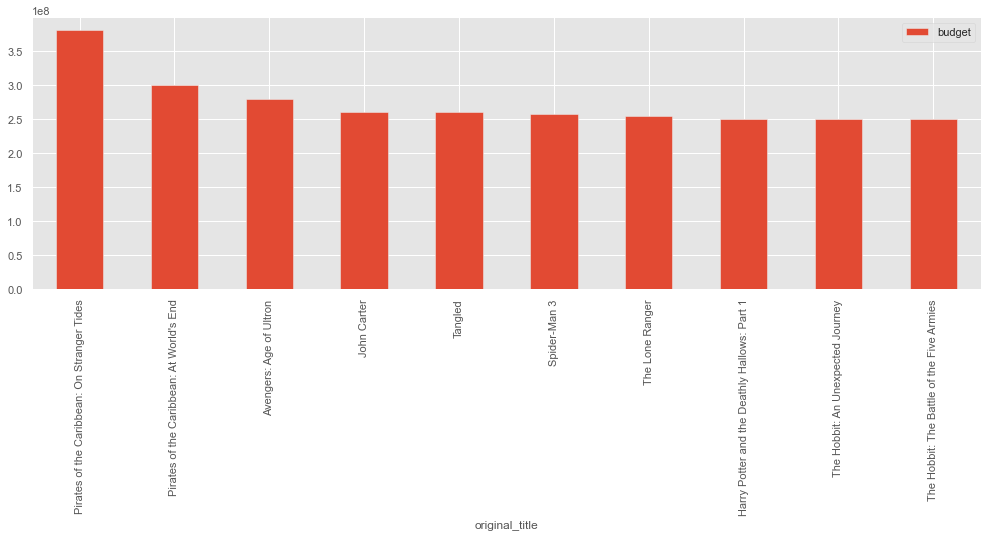

In [169]:
# продемонстрируем на графике десятку самых высокобюджетных фильмов
budget_chart = pd.DataFrame(data_chart.groupby(['original_title'])
                            ['budget'].mean())
budget_chart.sort_values(by='budget', 
                         ascending=False)[:10].plot(kind='bar')

# 2. Какой из фильмов самый длительный (в минутах)?

In [170]:
# думаю логику работы с этим словарем вы уже поняли, 
# по этому не буду больше его дублировать
answers['2'] = 'Gods and Generals (tt0279111)' # +

In [171]:
data[['imdb_id', 'original_title', 'runtime']][data.runtime == data.runtime.max()]

,imdb_id,original_title,runtime
1157,tt0279111,Gods and Generals,214


ВАРИАНТ 2

In [172]:
max_runtime = data.sort_values(by=['runtime'], ascending=False).iloc[0]
print('{}. {} ({})'.format(max_runtime.name, max_runtime.original_title, 
                           max_runtime.imdb_id))

1157. Gods and Generals (tt0279111)


# 3. Какой из фильмов самый короткий (в минутах)?





In [173]:
answers['3'] = 'Winnie the Pooh (tt1449283)' # +

In [174]:
data[['imdb_id', 'original_title', 'runtime']][data.runtime == data.runtime.min()]

,imdb_id,original_title,runtime
768,tt1449283,Winnie the Pooh,63


ВАРИАНТ 2

In [175]:
min_runtime = data.sort_values(by=['runtime'], ascending=False).iloc[-1]
print('{}. {} ({})'.format(min_runtime.name, min_runtime.original_title,
                           min_runtime.imdb_id))

768. Winnie the Pooh (tt1449283)


# 4. Какова средняя длительность фильмов?


In [176]:
answers['4'] = 110 # +

In [177]:
print(round(data.runtime.mean()))

110


ВАРИАНТ 2

In [178]:
#создаем новый DataFrame на основе статистики Data
stat_data = data.describe() 
print(int(round(stat_data['runtime']['mean'])))

110


# 5. Каково медианное значение длительности фильмов? 

In [179]:
answers['5'] = 107 # +

In [180]:
print(round(data.runtime.median()))

107


ВАРИАНТ 2

In [181]:
#самостоятельно высчитываем медиану
sorted_data = data.sort_values(by=['runtime'])
index = len(sorted_data.index)
median = int((sorted_data.runtime.iloc[round(index/2)] 
                + sorted_data.runtime.iloc[round(index/2)+1])/2)
print(median)

107


# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [182]:
answers['6'] = 'Avatar (tt0499549)' # +

In [183]:
data[['imdb_id', 'original_title', 'profit']][data.profit == data.profit.max()]

,imdb_id,original_title,profit
239,tt0499549,Avatar,2544505847


ВАРИАНТ 2

In [184]:
max_profit = data.sort_values(by=['profit'], ascending=False).iloc[0]
print('{} ({})'.format(max_profit.original_title, max_profit.imdb_id))

Avatar (tt0499549)


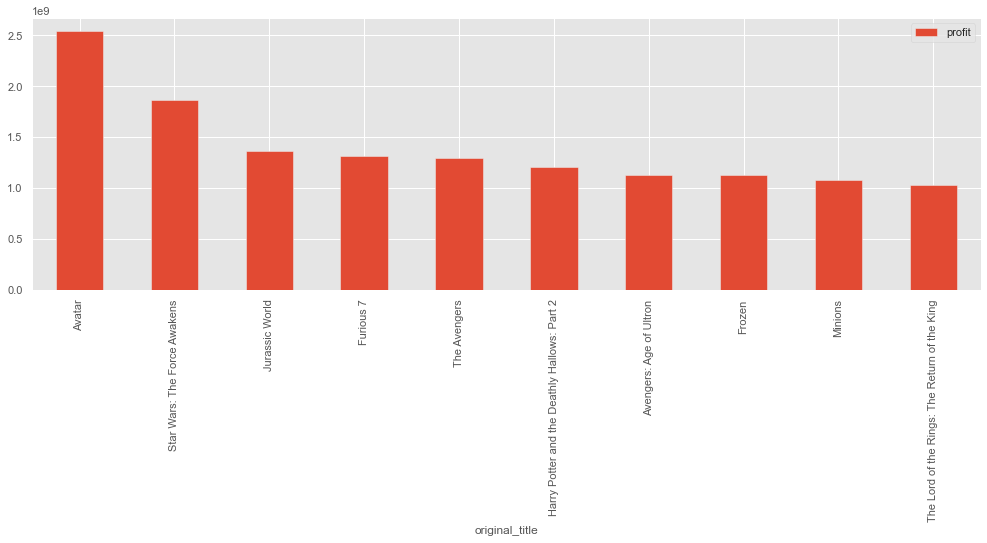

In [185]:
# продемонстрируем на графике десятку самых прибыльных фильмов
profit_chart = pd.DataFrame(data_chart.groupby(['original_title'])['profit'].mean())
profit_chart.sort_values(by='profit', ascending=False)[:10].plot(kind='bar')

# 7. Какой фильм самый убыточный? 

In [186]:
answers['7'] = 'The Lone Ranger (tt1210819)' # +

In [187]:
data[['imdb_id', 'original_title', 'profit']][data.profit == data.profit.min()]

,imdb_id,original_title,profit
1245,tt1210819,The Lone Ranger,-165710090


ВАРИАНТ 2

In [188]:
min_profit = data.sort_values(by=['profit'], ascending=False).iloc[-1]
print('{} ({})'.format(min_profit.original_title, min_profit.imdb_id))

The Lone Ranger (tt1210819)


# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [189]:
answers['8'] = 1478 # +

In [190]:
len(data.query('revenue > budget'))
# количество строк с фильмами, у которых сборы выше бюджета

1478

ВАРИАНТ 2

In [191]:
data[data.revenue > data.budget].imdb_id.nunique()
# количество уникальных id фильмов, где сборы выше бюджета

1478

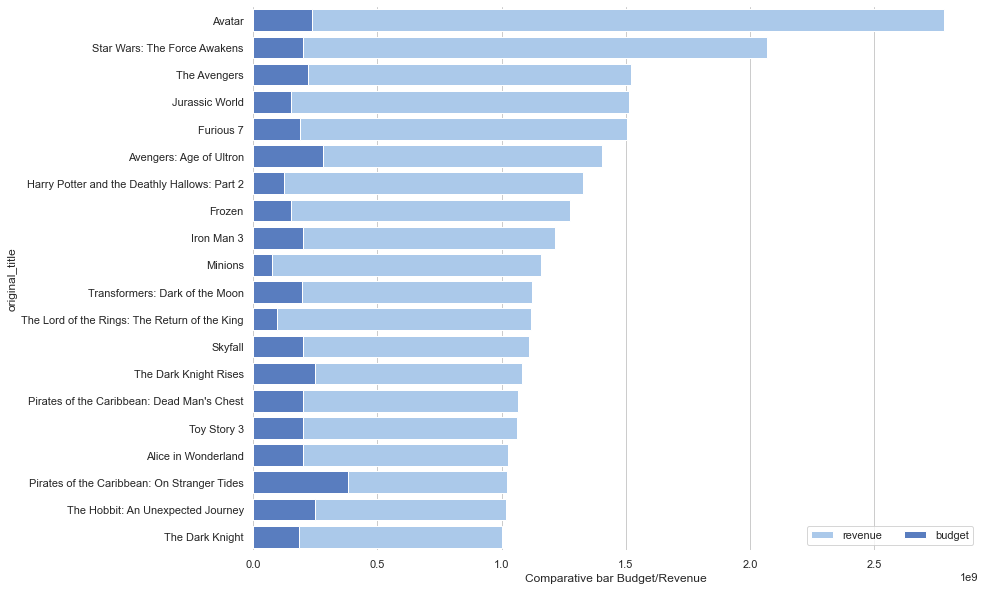

In [192]:
# Визуализируем разницу между бюджетом и кассовыми сборами 
# у лидеров проката (20-ка лучших)

# устанавливаем белую тему
sns.set(style="whitegrid")

# определяем тип графика
f, ax = plt.subplots(figsize=(13,10))

# создаем данные для графика, сортируем по убыванию 
# и берем первые 20
data_chart_sns = data_chart.sort_values(by='revenue', 
                                        ascending=False)[:20]

# описываем кассавые сборы
sns.set_color_codes("pastel")
sns.barplot(x="revenue", y="original_title", data=data_chart_sns,
            label="revenue", color="b")

# описываем бюджет
sns.set_color_codes("muted")
sns.barplot(x="budget", y="original_title", data=data_chart_sns,
            label="budget", color="b")

# описываем легенду
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Comparative bar Budget/Revenue")
sns.despine(left=True, bottom=True)

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [193]:
answers['9'] = 'The Dark Knight (tt0468569)' # +

In [194]:
# отбираем фильмы за 2008год
data_2008 = data.query('release_year == 2008') 
# выбираем самый кассовый фильм
movie = data_2008.query('revenue == revenue.max()').iloc[0]
print('{} ({})'.format(movie.original_title, movie.imdb_id))

The Dark Knight (tt0468569)


ВАРИАНТ 2

In [195]:
data[['original_title', 'imdb_id', 
      'revenue']][data.release_year == 2008].sort_values(by='revenue', 
                                                         ascending=False).iloc[0]
# код в одну строку, неудобный для просмотра

original_title    The Dark Knight
imdb_id                 tt0468569
revenue                1001921825
Name: 599, dtype: object

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [196]:
answers['10'] = 'The Lone Ranger (tt1210819)' # +

In [197]:
# отбираем фильмы за 3 года
data_year = data.query('2012 <= release_year <= 2014')
# отбираем фильм с самым минимальным доходом
bad_movie = data_year.query('profit == profit.min()').iloc[0] 
print('{} ({})'.format(bad_movie.original_title, bad_movie.imdb_id))

The Lone Ranger (tt1210819)


# 11. Какого жанра фильмов больше всего?

In [0]:
# эту задачу тоже можно решать разными подходами, попробуй реализовать разные варианты
# если будешь добавлять функцию - выноси ее в предобработку что в начале

In [198]:
answers['11'] = 'Drama' # +

In [199]:
# создаем большой список из всех жанров, переводим в Series и считаем жанры
genres = pd.Series(data.genres.str.cat(sep='|').split('|')).value_counts()
print(genres.index[0])

Drama


ВАРИАНТ 2

In [200]:
genres = data.genres.str.split('|') 
# чтобы не менять формат колонки в DataFrame, работаем с переменной
#(в таблице визуально лучше, когда жанры разделены '|')
# для удобной работы с объектами Series, меняем разделитель на ","

# создаем большой список (по анналогии с первым вариантом)
genres = genres.explode()

# считаем количество каждого объекта
top_genres = genres.value_counts()
print(top_genres.index[0])

Drama


ВАРИАНТ 3

In [201]:
genres = data.genres.str.split('|')
count_elements(genres) # используем функцию, созданную в предобработке

'Drama'

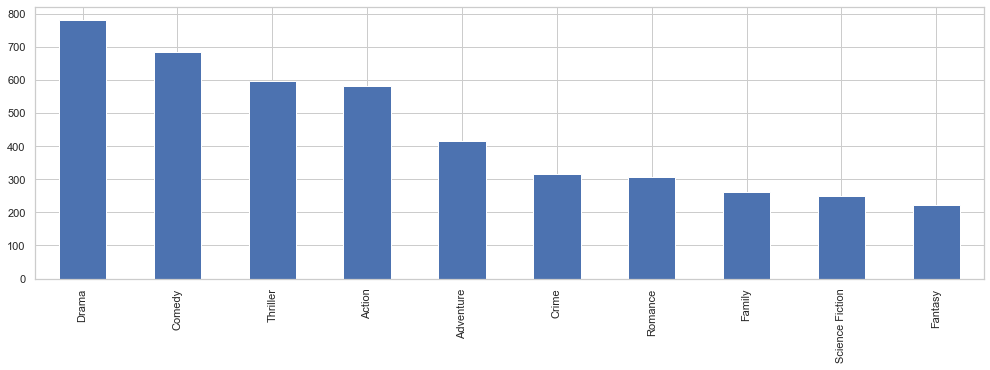

In [202]:
# используя решение второго варианта продемонстрируем десятку популярных жанров
top_genres[:10].plot(kind='bar')

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [203]:
answers['12'] = 'Drama' # +

In [204]:
#создаем спиок жанров прибыльных фильмов, переводим в Series и считаем значения
profitable_genres = pd.Series(data.genres[data.profit > 0]
                              .str.cat(sep='|').split('|')).value_counts()
profitable_genres.index[0]

'Drama'

ВАРИАНТ 2

In [205]:
# отбираем жанры только прибыльных фильмов
profit_genres = data[data.profit > 0].genres.str.split('|') 
count_elements(profit_genres) # используем функцию из предобработки

'Drama'

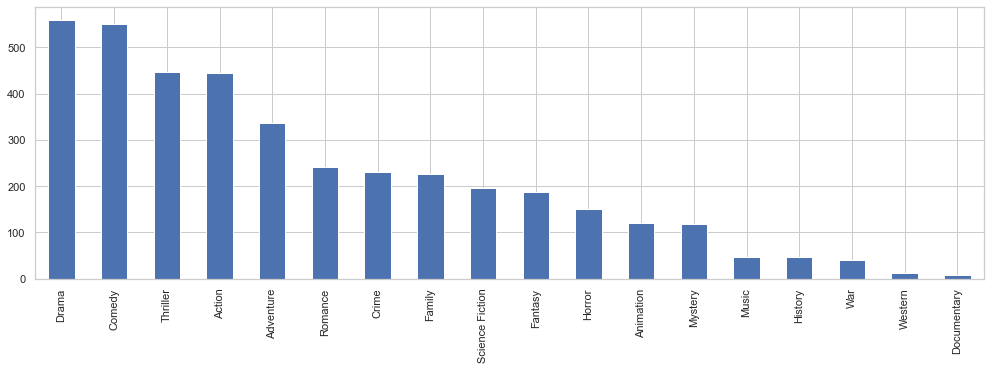

In [206]:
# продемонстрируем прибыльность разных жанров
profitable_genres.plot(kind='bar')

# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [207]:
answers['13'] = 'Peter Jackson' # +

In [208]:
# группируем данные по колонке режисеров и сумме кассовых сборов
top_director = data.groupby(['director'])['revenue'].sum().sort_values(ascending=False)
top_director.index[0]

'Peter Jackson'

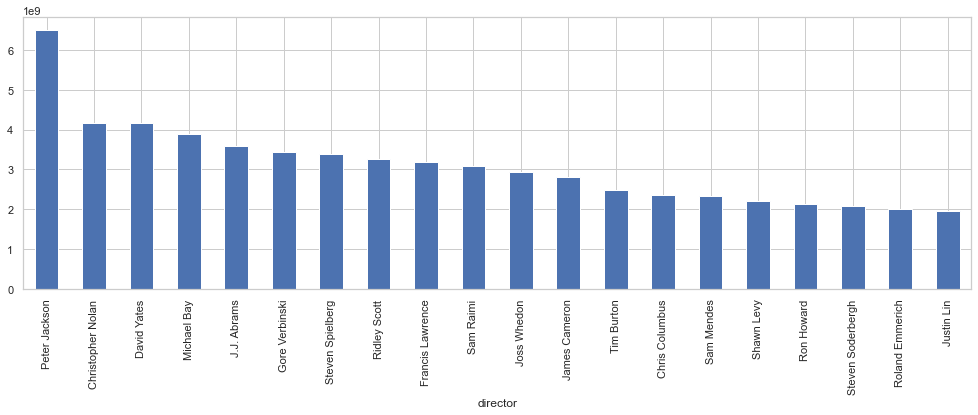

In [209]:
# 20 лучших режиссеров
top_director[:20].plot(kind='bar')

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [210]:
answers['14'] = 'Robert Rodriguez' # +

In [211]:
# отбираем данные по жанру Action и считаем режисеров
pd.Series(data[data.genres.str.contains('Action')]
          .director.str.cat(sep='|').split('|')).value_counts().index[0]

'Robert Rodriguez'

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [212]:
answers['15'] = 'Chris Hemsworth' # +

In [213]:
# отбираем фильмы за 2012 год
data_2012 = data[data.release_year == 2012].copy()

# убираем разделитель '|' в строках с актерами
data_2012.cast = data_2012.cast.str.split('|')

# расширяем DataFrame по списку актеров
data_2012 = data_2012.explode('cast')

# группируем данные по актерам и суммам сборов, сортируем результат
data_2012 = data_2012.groupby(['cast'])['revenue'].sum().sort_values(ascending=False)
display(data_2012.index[0])

'Chris Hemsworth'

ВАРИАНТ 2

In [214]:
# отбираем фильмы за 2012 год
data_2012 = data[data.release_year == 2012].copy()
# создаем список из всех актеров за 2012 год
acters = pd.Series(data_2012.cast.str.cat(sep='|').split('|')).unique().tolist()


# создаем список для хранения сумм кассовых сборов
sum_revenue = [] 
# создаем цикл для подсчета суммы сборов по всем фильмам каждого актера
# и сохраняем в список sum_revenue
for acter in acters:
    sum_revenue.append(data_2012[data_2012.cast.str.contains(acter)].revenue.sum())

    
# создаем DataFrame с перечнем актеров и суммами сборов по их фильмам
d = {'acter':acters, 'revenue':sum_revenue}
cast_revenue = pd.DataFrame(data = d)


# сортируем данные по сборам
top_cast = cast_revenue.sort_values(by='revenue', ascending=False)
print(top_cast.iloc[0]['acter'])

Chris Hemsworth


# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [215]:
answers['16'] = 'Matt Damon' # +

In [216]:
# отбираем фильмы с бюджетом выше среднего
data_budget = data[data.budget > data.budget.mean()].copy()

# собираем информацию по актерам из высокобюджетных фильмов, 
# считаем количество по каждому актеру
acters_maxbudget = pd.Series(data_budget.cast.str.cat(sep='|').split('|')).value_counts()

# выбираем актера с большим количеством фильмов
acters_maxbudget.sort_values(ascending=False).index[0]

'Matt Damon'

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [217]:
answers['17'] = 'Action' # +

In [218]:
# отбираем фильмы, в которых снимался Nicolas Cage, 
# считаем жанры и выбираем самый многочисленный
Cage_data = data[data.cast.str.contains('Nicolas Cage')]
Cage_genres = pd.Series(Cage_data.genres.str.cat(sep='|').split('|')).value_counts()
Cage_genres.sort_values(ascending=False).index[0]

'Action'

# 18. Самый убыточный фильм от Paramount Pictures

In [219]:
answers['18'] = 'K-19: The Widowmaker (tt0267626)' # +

In [220]:
PP_data = data[data.production_companies.str.contains("Paramount Pictures")].copy()
min_profit = PP_data.sort_values(by='profit').iloc[0]

print('{} ({})'.format(min_profit['original_title'], min_profit['imdb_id']))

K-19: The Widowmaker (tt0267626)


# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [221]:
answers['19'] = 2015 # +

In [222]:
# группируем данные по годам и кассовым сборам, 
# суммируем сборы и выбираем максимальное значение
profit_year = data.groupby(['release_year'])['revenue'].sum().sort_values(ascending=False)
print(profit_year.index[0])

2015


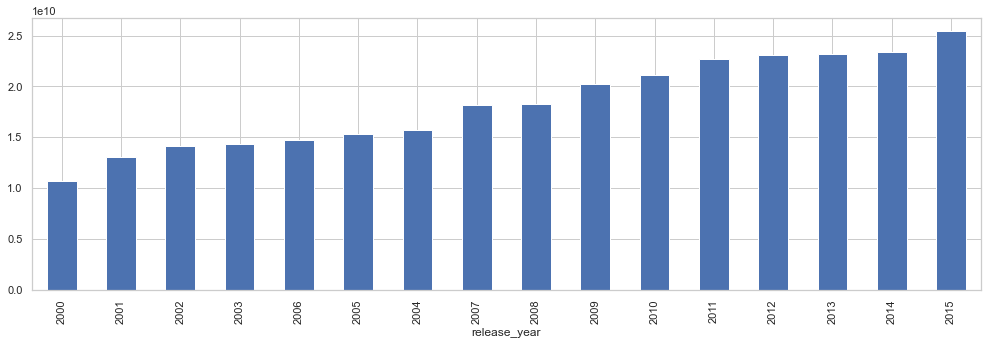

In [223]:
# продемонстрируем как росли сборы по годам
profit_year.sort_values().plot(kind='bar')

# 20. Какой самый прибыльный год для студии Warner Bros?

In [224]:
answers['20'] = 2014 # +

In [225]:
WB_year = data[data.production_companies.
               str.contains('Warner Bros')].groupby(['release_year'])['profit'].sum()
WB_year.sort_values(ascending=False).index[0]

2014

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [226]:
answers['21'] = 'September' # +

In [227]:
# для решения задания используем DataFrame с месяцами из предобработки
# группируем данные по месяцам и считаем количество фильмов
top_month = MonthRelease_data.groupby(['month_release'])['imdb_id'].count().sort_values(ascending=False)
print(top_month.index[0])

September


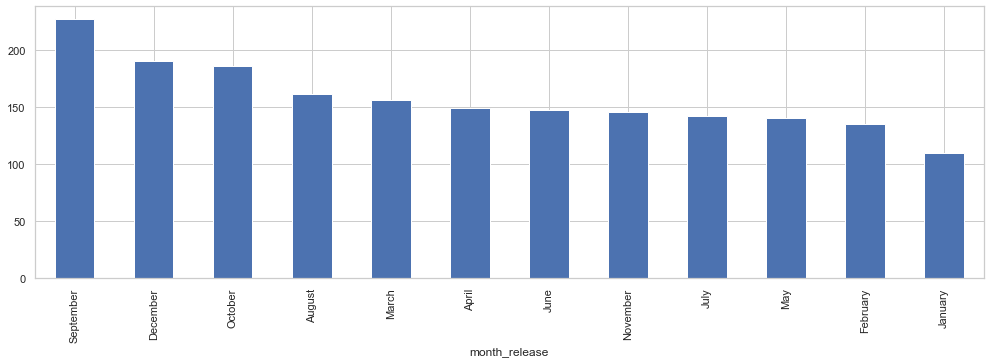

In [228]:
# отобразим все месяцы в порядке убывания фильмов
top_month.plot(kind='bar')

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [229]:
answers['22'] = 450 # +

In [230]:
# используя сгруппированнные данные из прошлого задания, находим количество за три месяца
top_month[['June', 'July', 'August']].sum()

450

ВАРИАНТ 2

In [231]:
# используя DataFrame из предобработки, делаем отбор по месяцам 
# и считаем количество уникальных id фильмов
MonthRelease_data.query('month_release in ["June", "July", "August"]').imdb_id.count()

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [232]:
answers['23'] = 'Peter Jackson' # +

In [235]:
# используем DataFrame с месяцами выхода фильмов из предобработки
# создаем DataFrame с данными только по зимним месяцам
winter_data = MonthRelease_data.query('month_release in ["December", "January", "February"]')

# разделяем режиссеров без '|'
winter_data.director = winter_data.director.str.split('|')

# расширяем зимний DataFrame в соответствии с количеством режиссеров
winter_data = winter_data.explode('director')

# группируем данные по режиссерам и количеству их фильмов
win_dir = winter_data.groupby(['director'])['imdb_id'].count().sort_values( ascending=False)

display(win_dir.index[0])

'Peter Jackson'

ВАРИАНТ 2

In [234]:
# создаем DataFrame с данными только по зимним месяцам
winter_data = MonthRelease_data.query('month_release in ["December", "January", "February"]')

# самый простой способ получить количество фильмов по режисерам 
# - это сгруппировать данные, но не самый правильный, 
# из-за наличия списка режисеров по некоторым фильмам
WintMovies = winter_data.groupby(['director'])['imdb_id'].count().sort_values(ascending=False)
print(WintMovies.index[0])

Peter Jackson


ВАРИАНТ 3

In [236]:
# создаем DataFrame с данными только по зимним месяцам
winter_data = MonthRelease_data.query('month_release in ["December", "January", "February"]')

# создаем список всех режисеров
winter_directors = pd.Series(winter_data.director
                             .str.cat(sep='|').split('|')).unique().tolist()

# создаем список для хранения количества фильмов
director_movie = [] 
# по списку режисеров считаем количество фильмов зимой
for director in winter_directors:
    director_movie.append(winter_data
                          [winter_data.director.str.contains(director)].imdb_id.count())

# создаем DataFrame с фильмами по режисерам и сортируем его
WintMovies_director =pd.DataFrame({'director':winter_directors, 
                                   'count_movies':director_movie})
WintMovies_director = WintMovies_director.sort_values(by='count_movies', 
                                                      ascending=False)
print(WintMovies_director.iloc[0]['director'])

Peter Jackson


# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [237]:
answers['24'] = 'Four By Two Productions' # +

In [238]:
# создаем новый DataFrame для поиска решения
dt1 = data.copy()

# создаем список студий в каждой строке файла
dt1['production_companies'] = dt1.production_companies.str.split('|')

# добавляем столбец с длиной названий фильмов
dt1['title_length'] = dt1['original_title'].map(lambda x: len(x))

# создаем дубли строк с разными студиями
dt1 = dt1.explode('production_companies')

# группируем данные по студиям и средними значениями длин названий фильмов, сортируем по убыванию
mean_length = dt1.groupby(['production_companies'])['title_length'].mean().sort_values(ascending=False)

# находим студию с большей длиной названия
print(mean_length.index[0])

Four By Two Productions


# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [239]:
answers['25'] = 'Midnight Picture Show' # +

In [240]:
# создаем новый DataFrame для поиска решения
data_1 = data.copy()

# создаем список студий в каждой строке файла
data_1['production_companies'] = data_1.production_companies.str.split('|')

# добавляем столбец с длиной описания фильмов
data_1['overview_length'] = (data_1.overview.str.split()).str.len()

# создаем дубли строк с разными студиями
data_1 = data_1.explode('production_companies')

# группируем данные по студиям и средними значениями длин описаний фильмов, сортируем по убыванию
mean_overview = data_1.groupby(['production_companies'])['overview_length'].mean().sort_values(ascending=False)

# находим студию с большей длиной описания
print(mean_overview.index[0])

Midnight Picture Show


ВАРИАНТ 2

In [242]:
# создаем копию данных для поиска решения
data_2 = data.copy()

# создаем список всех студий
companies = pd.Series(data_2.production_companies.str.cat(sep='|')
                      .split('|')).unique().tolist()

# находим длину описания и создаем столбец
len_overview = (data_2.overview.str.split()).str.len()
data_2.insert(5, 'overview_length', len_overview)

# по списку всех студий считаем среднюю длину описаний и вносим в отдельный список
count_overview = []
for company in companies:
    count_overview.append(round(data_2[data_2.production_companies.str.contains(company)]
                             .overview_length.mean(), 2))
    
# создаем DataFrame с данными по студиям и длинами описаний, сортируем по убыванию
overview_long = pd.DataFrame({'companies': companies, 
                           'mean_overview': count_overview}).sort_values(by='mean_overview', 
                                                                         ascending=False)

# находим студию с наибольшим средним значением длины
display(overview_long.iloc[0]['companies'])

'Midnight Picture Show'

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [243]:
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave' # +

In [244]:
# с помощью data.info() мы знаем общее количество фильмов 1889
# отсюда рассчитываем 1% фильмов: с округлением 19
# остается отсортировать рейтинг по убыванию и запросить только 19 первых фильмов
# PS: учитывая что в прошлом проекте сняли бал за программный поиск диапазона,
# а расчситать 1% очень легко, в данном задании программного поиска 1% описывать не буду

display(data[['original_title', 'vote_average']].sort_values(by='vote_average', 
                                                     ascending=False).head(19))

,original_title,vote_average
599,The Dark Knight,8.1
118,Interstellar,8.0
125,The Imitation Game,8.0
9,Inside Out,8.0
34,Room,8.0
1183,The Wolf of Wall Street,7.9
128,Gone Girl,7.9
1191,12 Years a Slave,7.9
119,Guardians of the Galaxy,7.9
1081,The Lord of the Rings: The Return of the King,7.9


# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [245]:
answers['27'] = 'Daniel Radcliffe', 'Rupert Grint' # +

In [246]:
# импортируем функцию для создания пар актеров
from itertools import combinations

# создаем копию данных для решения задания
# в колонке с актерами создаем список через ',' без '|'
cast_data = data.copy()
cast_data['cast'] = cast_data.cast.str.split('|')

# создаем список для хранения пар актеров
# для каждой строки (фильма) в колонке актеров создаем пары актеров 
# и сохраняем в список
acters_pairs = []
for line in cast_data['cast']:
    acters_comb = list(combinations(line, 2))
    acters_pairs.append(acters_comb)
    
# используя функцию из предобработки, 
# считаем количество повторений каждой пары 
# выводим пару актеров с максимальным количеством повторений
print(count_elements(acters_pairs))

('Daniel Radcliffe', 'Rupert Grint')


ВАРИАНТ 2

In [247]:
# второй вариант решения отличается от первого только 
# в способе подсчета одинаковых пар актеров в разных фильмах
# для решения используется созданный ранее список пар актеров

# создаем Series из списков всех пар актеров
# и создаем DataFrame из пар и их количества
acters_together = pd.Series(acters_pairs).explode()
acters_data = pd.DataFrame(acters_together.value_counts(), 
                           columns=['count_pair'])

# сортируем данные от большего к меньшему 
# и выводим пары с максимальным значением
acters_data = acters_data.sort_values(by='count_pair', ascending=False)
print(acters_data[acters_data.count_pair==acters_data.count_pair.max()].index)

Index([('Daniel Radcliffe', 'Emma Watson'), ('Daniel Radcliffe', 'Rupert Grint')], dtype='object')


# Submission

In [248]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': 'Pirates of the Caribbean: On Stranger Tides (tt1298650)',
 '2': 'Gods and Generals (tt0279111)',
 '3': 'Winnie the Pooh (tt1449283)',
 '4': 110,
 '5': 107,
 '6': 'Avatar (tt0499549)',
 '7': 'The Lone Ranger (tt1210819)',
 '8': 1478,
 '9': 'The Dark Knight (tt0468569)',
 '10': 'The Lone Ranger (tt1210819)',
 '11': 'Drama',
 '12': 'Drama',
 '13': 'Peter Jackson',
 '14': 'Robert Rodriguez',
 '15': 'Chris Hemsworth',
 '16': 'Matt Damon',
 '17': 'Action',
 '18': 'K-19: The Widowmaker (tt0267626)',
 '19': 2015,
 '20': 2014,
 '21': 'September',
 '22': 450,
 '23': 'Peter Jackson',
 '24': 'Four By Two Productions',
 '25': 'Midnight Picture Show',
 '26': 'Inside Out, The Dark Knight, 12 Years a Slave',
 '27': ('Daniel Radcliffe', 'Rupert Grint')}

In [249]:
# и убедиться что ни чего не пропустил)
len(answers)

27